In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("E:/melbourne_housing_projects/housing_data1.csv")
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,h,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,Eastern,4019
1,3,h,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,Eastern,4019
2,4,h,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,Eastern,4019
3,3,h,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,Eastern,4019
4,2,h,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,Eastern,4019


In [3]:
df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.shape

(6830, 16)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
Rooms            6830 non-null int64
Type             6830 non-null object
Price            6830 non-null int64
Method           6830 non-null int64
SellerG          6830 non-null int64
Distance         6830 non-null float64
Postcode         6830 non-null int64
Bathroom         6830 non-null int64
Car              6830 non-null int64
Landsize         6830 non-null int64
BuildingArea     6826 non-null float64
YearBuilt        6830 non-null int64
CouncilArea      6830 non-null int64
Longtitude       6826 non-null float64
Regionname       6830 non-null object
Propertycount    6830 non-null int64
dtypes: float64(3), int64(11), object(2)
memory usage: 853.8+ KB


In [6]:
#check unique values for all data columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('----'*20)

Rooms
[2 3 4 1 6 5 8 7]
--------------------------------------------------------------------------------
Type
['h' 'p' 'r']
--------------------------------------------------------------------------------
Price
[1035000 1465000 1600000 ... 1848000  717500  951000]
--------------------------------------------------------------------------------
Method
[1 3 4 0 2]
--------------------------------------------------------------------------------
SellerG
[ 23 155 106 117 111  49 135  28 133  16 204  90 260  32  85 192  41  27
 146 127 140  15 239  31 251  51  71 104 195  99  94 194   4 139 221  73
 161 229 188 196 150  68  82  46 179 193  10  47 134  74  13 167 255  17
  35  72  19 137 160 126   5 222  20 230 257  78 228  87 243  63  43 178
  84 261 164 210 244  42 114 185 227 183  14   6 207   2  18  91 267 159
 197 190 174 237  95 216 181 170 151 252  33  76 173 176 200  37 153  86
 101 105  70 144  57 254 250  92  29 154 242 223  21 109  40 201  48  79
 132 163  34 240 156  53 219  83  6

          nan]
--------------------------------------------------------------------------------
YearBuilt
[1900 2014 1910 1890 2005 2009 1880 1985 1970 2013 2012 1920 1950 1998
 1930 2016 1965 1980 2011 2015 1975 1993 1960 1995 2010 1996 2000 1925
 2004 2008 1962 1955 1988 1953 1990 2007 1967 1964 1889 1888 1935 1969
 1940 1887 1904 1972 1978 1939 2003 1938 2006 1945 1947 1958 2017 1992
 1961 1977 2001 1948 1927 1997 1981 1943 1974 1968 1928 1926 2002 1999
 1949 1905 1924 1991 1942 1973 1915 2018 1916 1982 1957 1897 1994 1912
 1989 1923 1983 1903 1976 1830 1986 1937 1908 1966 1913 1917 1885 1854
 1898 1941 1951 1946 1956 1984 1901 1987 1959 1979 1933 1971 1919 1886
 1906 1875 1863 1934 1850 1918 1856 1860 1877 1894 1884 1963 1895 1907
 1902 1952 1954 1922 1921 1872 1196 1892 1936 1929]
--------------------------------------------------------------------------------
CouncilArea
[31 21 25  6 10 26  2 20  8 28 16  1 23 15  0 12  3 18 11 13 19 17  9 24
 29  7 14 32 30  5  4 -1]
-----------

In [7]:
#List of numeric columns and categorical columns
num_cols=list(df.select_dtypes(exclude=['object']))

In [8]:
num_cols

['Rooms',
 'Price',
 'Method',
 'SellerG',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Longtitude',
 'Propertycount']

In [9]:
cat_cols=list(df.select_dtypes(include=['object']))
cat_cols

['Type', 'Regionname']

In [10]:
df.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     4
YearBuilt        0
CouncilArea      0
Longtitude       4
Regionname       0
Propertycount    0
dtype: int64

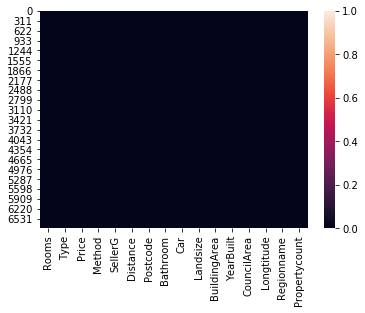

In [11]:
sns.heatmap(df.isnull())

In [12]:
df['BuildingArea'].fillna(df['BuildingArea'].mean(),inplace=True)


In [13]:
df['Longtitude'].fillna(df['Longtitude'].mean(),inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labelenc=LabelEncoder()
df[cat_cols]=df[cat_cols].apply(LabelEncoder().fit_transform)

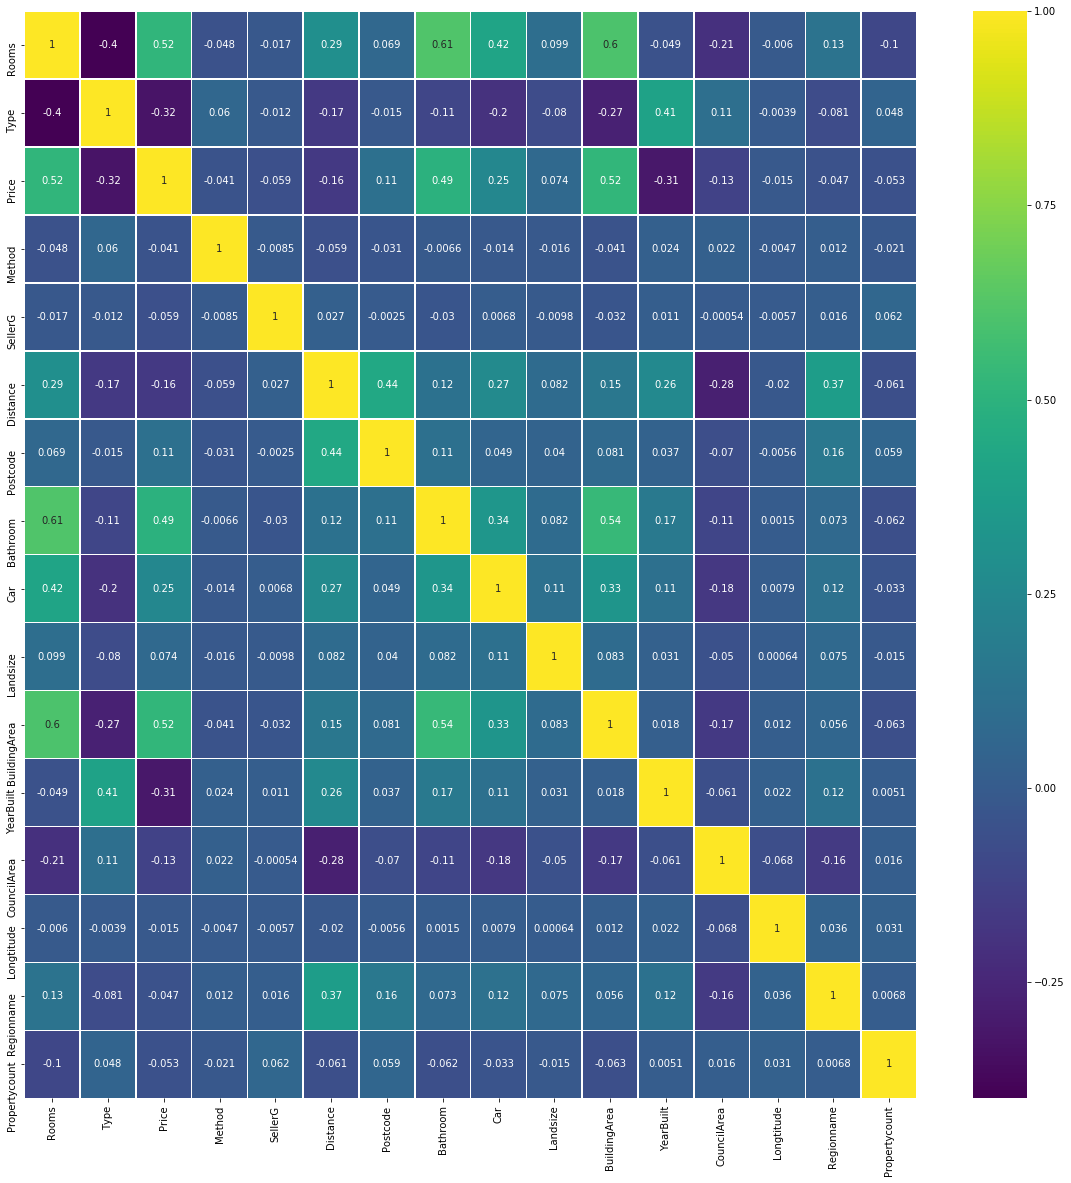

In [16]:
#Correlation between features
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('Price',axis=1)
y=df['Price']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.5776433627148936


In [22]:
from sklearn.linear_model import Lasso

In [36]:
lasso=Lasso(alpha=2)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
r2_lasso=r2_score(y_test,lasso_pred)
print(r2_lasso)

0.5776441485419331


In [24]:
from sklearn.linear_model import Ridge

In [37]:
ridge=Ridge(alpha=2)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
r2_ridge=r2_score(y_test,ridge_pred)
print(r2_ridge)

0.5776710150271664


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
regressor=LinearRegression()
score=cross_val_score(regressor,X_train,y_train,cv=10)
print(score)
mean_score=score.mean()
print(mean_score)

[0.5628921  0.60043293 0.65437821 0.66775947 0.39437383 0.57050675
 0.63329113 0.62769002 0.38531145 0.58954127]
0.5686177172873903


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [31]:
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_poly=r2_score(y_test,y_pred)
print(r2_poly)

0.7092941954696736
